# Report: This projects analyzes the number of car registraitons 
# with electric drive compare to the with the prize for electric energy.

First of all the question to ask is a higher number of electric cars a factor that raises the energy prize in germany.

# The following two data source are usde:
## Source 1: Carregistration per year in germany with alternative drives

This project uses open data from Mobilithek (https://www.kba.de/SharedDocs/Downloads/DE/Statistik/Fahrzeuge/FZ28/fz28_2022_09.xlsx?__blob=publicationFile&v=4) to get the number on cars with electric drive which are new on the streets each year.


## Source 2: The energy prizes per year in germany

The second data is from govdata.com (https://www-genesis.destatis.de/genesis/downloads/00/tables/61243-0002_00.csv) to get required energy bills.

The question that interests me is: Does more electric cars cause increasing energy prizes?

## Install dependencies
Initially, install all required dependencies. The specific version of SQLAlchemy is needed because SQLAlchemy 2.0 does not work with pandas yet. nbformat allows the use of the "notebook" formatter for the plot, others can not be rendered to HTML.

In [1]:
%pip install pandas
%pip install plotly
%pip install 'SQLAlchemy==1.4.46'
%pip install nbformat
%pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load data
Create a pandas dataframe using the local sqlite file.

In [2]:
import pandas as pd

df = pd.read_sql_table('Cars', 'sqlite:///./Result.sqlite')
df_energy = pd.read_sql_table('Prize', 'sqlite:///./Result.sqlite')


## Does electric cars on the streets of germany have an impact on the electric bill?
To answer our initial question, we use plotly to draw a scatterplot of all train stops in the dataset, overlaying it on a map from OpenStreetMap.

The train stops will be colored based on the `Betreiber_Name`, allowing us to see what area an operator services.

TypeError: cannot unpack non-iterable function object

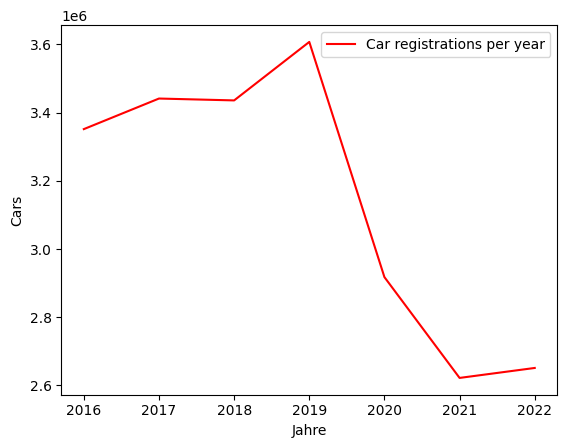

In [23]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


conn = sqlite3.connect('./Result.sqlite')
cursor = conn.cursor()

cars_axes = "SElECT Monat, Insgesamt FROM Cars"
prize_axes = "SELECT Jahr, Insgesamt FROM Prize"

df1 = pd.read_sql_query(cars_axes, conn)
df2 = pd.read_sql_query(prize_axes, conn)
conn.close()

x1 = ['2016','2017','2018','2019','2020','2021','2022']#df1['Monat']
#x1 = df1['Monat']
x2 = df2['Jahr']
y1 = df1['Insgesamt']
y2 = df2['Insgesamt']

fig, ax1= plt.subplots()

ax1.plot(x1,y1,'r-',label='Car registrations per year')
ax1.set_xlabel('Jahre')
ax1.set_ylabel('Cars')
ax1.legend()


#ax2 = ax1.twinx()
fig2, ax2 = plt
ax2.plot(x2,y2,'r-',label='Energy bill')
ax2.set_xlabel('Jahre')
ax2.set_ylabel('bill')
ax2.legend()


#works but dont look good
#plt.plot(x1,y1,label='Cars registration')
#plt.plot(x2,y2,label='Energy prizes')

#plt.plot(cars_axes['Monat'], cars_axes['Insgesamt'], label = 'Car Registration')
#plt.plot([1,2,3,4], [0.6, 0.5,0.7,0.8], label = 'Energy bills')
#prize_axes['Haushalte']
#plt.xlabel('Jahr')
#plt.ylabel('')

#plt.title('Energybills in constrast to new electric cars')

#plt.legend()

plt.show()




In [20]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Verbindung zur Datenbank herstellen
conn = sqlite3.connect('./Result.sqlite')

# SQL-Abfrage zum Abrufen der ersten Tabelle
sql_query1 = "SELECT Monat FROM Cars"

# SQL-Abfrage zum Abrufen der zweiten Tabelle
sql_query2 = " SELECT Jahr FROM Prize"

# Daten aus den Tabellen in DataFrames laden
df1 = pd.read_sql_query(sql_query1, conn)
df2 = pd.read_sql_query(sql_query2, conn)

# Plot 1 erstellen
plt.figure(figsize=(10, 6))
plt.plot(df1['x'], df1['y'], label='Cars')
plt.xlabel('x-Achse')
plt.ylabel('y-Achse')
plt.title('Plot 1')
plt.legend()

# Plot 2 erstellen
plt.figure(figsize=(10, 6))
plt.plot(df2['x'], df2['y'], label='Prize')
plt.xlabel('x-Achse')
plt.ylabel('y-Achse')
plt.title('Plot 2')
plt.legend()

# Plots anzeigen
plt.show()

# Verbindung zur Datenbank schließen
conn.close()


KeyError: 'x'

<Figure size 1000x600 with 0 Axes>